In [1]:
from tensorflow import keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train)

In [5]:
import matplotlib.pyplot as plt

<ipython-input-6-398868551ec8>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


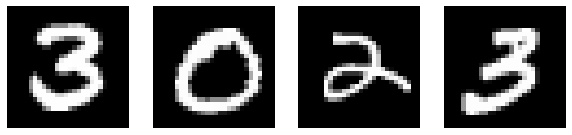

In [6]:
fig, axs = plt.subplots(1, 4, figsize= (10, 10))
axs[0].imshow(X_train[0], cmap='gray')
axs[1].imshow(X_train[5], cmap='gray')
axs[2].imshow(X_train[9], cmap='gray')
axs[3].imshow(X_train[12], cmap='gray')
axs[0].axis(False)
axs[1].axis(False)
axs[2].axis(False)
axs[3].axis(False)
fig.show()

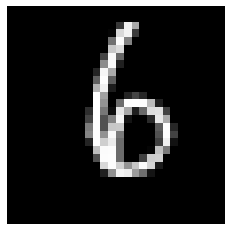

In [7]:
plt.imshow(X_train[33], cmap='gray', vmin=0, vmax=255)
plt.axis(False)
plt.show()

In [8]:
model = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=(28, 28)), 
     keras.layers.Dense(300, activation = 'relu'), 
     keras.layers.Dense(100, activation = 'relu'),
     keras.layers.Dense(50, activation = 'relu'), 
     keras.layers.Dense(10, activation = 'softmax')]
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________


In [10]:
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [11]:
model.compile(loss = [keras.losses.sparse_categorical_crossentropy]
              , optimizer = keras.optimizers.Adam(), 
              metrics = [keras.metrics.sparse_categorical_accuracy])

In [12]:
#check_point = keras.callbacks.ModelCheckpoint("mnist_keras_v0.h5")
early_stopping = keras.callbacks.EarlyStopping(patience=10, 
                                              restore_best_weights = True)

In [13]:
X_train.shape

(45000, 28, 28)

In [14]:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_val, y_val), 
                    callbacks = [early_stopping])

Epoch 1/30
1407/1407 [==============================] - 7s 4ms/step - loss: 0.9820 - sparse_categorical_accuracy: 0.8059 - val_loss: 0.4783 - val_sparse_categorical_accuracy: 0.8694
Epoch 2/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2947 - sparse_categorical_accuracy: 0.9269 - val_loss: 0.2915 - val_sparse_categorical_accuracy: 0.9265
Epoch 3/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1946 - sparse_categorical_accuracy: 0.9485 - val_loss: 0.1954 - val_sparse_categorical_accuracy: 0.9463
Epoch 4/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1456 - sparse_categorical_accuracy: 0.9598 - val_loss: 0.1628 - val_sparse_categorical_accuracy: 0.9593
Epoch 5/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1231 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.1829 - val_sparse_categorical_accuracy: 0.9532
Epoch 6/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1053 - spars

In [15]:
import pandas as pd

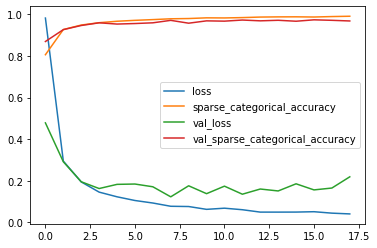

In [16]:
pd.DataFrame(history.history).plot()
plt.show()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1250 - sparse_categorical_accuracy: 0.9710


[0.12498439848423004, 0.9710000157356262]

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
import numpy as np

In [21]:
conf_mat = confusion_matrix(y_true = y_test, y_pred = np.argmax(model.predict(X_test), axis = 1))

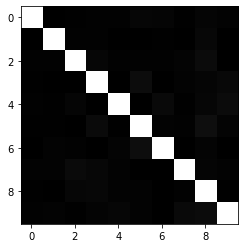

In [22]:
plt.imshow(conf_mat, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()